### Tips for  Webscraping Updated Table in Week3 Peer Graded Assignment

 **After retreiving the URL and creating a Beautiful soup object** 

 **Firstly create a list**  

 **Later after finding the table and table data  create a dictionary called cell having 3 keys PostalCode, Borough and Neighborhood.**

**As postal code contains upto 3 characters extract that using tablerow.p.text**

 **Next use split ,strip and replace functions for getting Borough and Neighborhood information.**.

 **Append to the list**  

 **Create a dataframe with list**

## Sample code

In [94]:
import pandas as pd 
import numpy as np 
from bs4 import BeautifulSoup as bs
import requests 

import folium # map rendering library

In [43]:
html = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text


In [45]:
soup = bs(html,"html5lib")


In [46]:

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ') 
        table_contents.append(cell)

      

In [78]:


# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


* The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
* Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
* More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is * listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods * * separated with a comma as shown in row 11  in the above table.
* If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
* Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
* In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [69]:
# no unsigned Neighborhood
def not_assigned(x):
    return (x == "Not assigned")
print(df["Neighborhood"].apply(not_assigned).all()) # false if there is not not asssgin

df = df[~df['Borough'].isna()]
df.shape

False


(103, 3)

In [70]:
import geocoder # import geocoder


def lat_lon(x):
    return geocoder.google(f'{x}, Toronto, Ontario').latlng
lat_lon_list = df['PostalCode'].apply(lat_lon)

lat_lon_list



0      None
1      None
2      None
3      None
4      None
       ... 
98     None
99     None
100    None
101    None
102    None
Name: PostalCode, Length: 103, dtype: object

In [72]:
x = geocoder.google(f'{df["PostalCode"][0]}, Toronto, Ontario')
x

<[REQUEST_DENIED] Google - Geocode [empty]>

### unable to use google api, i turned to coursera dataset 

In [73]:
lat_lon_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')

In [74]:
lat_lon_df

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [79]:
df = df.sort_values(by="PostalCode")
ans_df = pd.concat([df,lat_lon_df[['Latitude','Longitude']]],axis=1)

In [80]:
ans_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.806686,-79.194353
1,M4A,North York,Victoria Village,43.784535,-79.160497
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.763573,-79.188711
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.770992,-79.216917
4,M7A,Queen's Park,Ontario Provincial Government,43.773136,-79.239476
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.706876,-79.518188
99,M4Y,Downtown Toronto,Church and Wellesley,43.696319,-79.532242
100,M7Y,East Toronto Business,Enclave of M4L,43.688905,-79.554724
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.739416,-79.588437


# Analysis

In [92]:
ans_df.describe().T['mean'] # mean place of neiborhood

Latitude     43.704608
Longitude   -79.397153
Name: mean, dtype: float64

In [97]:
# create map of toranto using latitude and longitude values

map_toranto = folium.Map(location=ans_df.describe().T['mean'], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ans_df['Latitude'], ans_df['Longitude'], ans_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toranto)  
    
map_toranto

In [353]:
FourSquare_api_credential = {'CLIENT_ID' :'VAC3EQOK3UPT3VJK1O50F1P3MP5RRGLOVDR13L2G3DXGXSXS', # your Foursquare ID
'CLIENT_SECRET' :'JBLQJPV3X52LXUPZRN3BVOUR000AAWUIKBKU5QALACZD044Z', # your Foursquare Secret
'ACCESS_TOKEN' : 'G2LFIO3NJLYX4F2YNHUZ51N5I4ILKN4ZFGE10T52MYAAA4MT', # your FourSquare Access Token
'VERSION' : '20180604'}

def FourSquare_api(lat, lon, credentails, radis = 500, limit = 30):
    ret = f'https://api.foursquare.com/v2/venues/explore?&client_id={credentails["CLIENT_ID"]}&client_secret={credentails["CLIENT_SECRET"]}&v={credentails["VERSION"]}&ll={lat},{lon}&radius={radis}&limit={limit}'

    return ret 

In [354]:
list_to_concat = []

for i in range(len(ans_df)):

    results = requests.get(FourSquare_api(ans_df.T[i]['Latitude'], ans_df.T[i]['Longitude'],FourSquare_api_credential)).json()

    list_to_concat.append(unit(results))
    

In [355]:
def unit(api_respones):

    ret_list=[]

    for i in range(len(results['response']['groups'][0]['items'])):

        x = results['response']['groups'][0]['items'][i]['venue']['categories'][0]['name']

        if ("Restaurant" in x):
            x = "Restaurant"


        ret_list.append(x)

    return ret_list



In [356]:
list_to_concat = pd.Series(list_to_concat)

In [357]:
labbel_set = set()
for i in list_to_concat:
    for j in i:
        labbel_set.add(j)

In [358]:
ans_df_copy

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Beer Store,Comic Shop,Men's Store,Butcher,Noodle House,...,Athletics & Sports,Electronics Store,Sporting Goods Shop,Photography Studio,Pub,Pet Store,Housing Development,Board Shop,Carpet Store,Museum
0,M3A,North York,0,43.806686,-79.194353,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M4A,North York,0,43.784535,-79.160497,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,Downtown Toronto,0,43.763573,-79.188711,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M6A,North York,0,43.770992,-79.216917,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M7A,Queen's Park,0,43.773136,-79.239476,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,0,43.706876,-79.518188,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,M4Y,Downtown Toronto,0,43.696319,-79.532242,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,M7Y,East Toronto Business,0,43.688905,-79.554724,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,M8Y,Etobicoke,0,43.739416,-79.588437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
ans_df_copy = ans_df.copy()

# manual one hot 
for i in list(labbel_set):
    ans_df_copy[i] = list_to_concat.apply(lambda x : x.count(i))



# new_ans_df = ans_df_copy
# new_ans_df = pd.concat([ans_df,list_to_concat],axis=1)

In [555]:
onehot = ans_df_copy.iloc[:,5:]

In [591]:
onehot['large_amount_of_facilities'] = onehot.T.sum()>10 

In [593]:
from sklearn import preprocessing

x = onehot.values #returns a numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

onehot_norm = pd.DataFrame(x_scaled)



In [594]:
import numpy as np
from sklearn.decomposition import PCA

In [595]:
pca = PCA(0.7)

In [596]:
pca.fit(onehot_norm)

PCA(n_components=0.7)

In [599]:
pca_data = pca.transform(onehot_norm)

In [601]:
pca_data_df = pd.DataFrame(pca_data)

In [618]:
# set number of clusters
from sklearn.cluster import KMeans

kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(onehot_norm)


type_dic = {}
for  i , cates  in enumerate(kmeans.cluster_centers_):
    type_dic[i] = []

    # top two feagure
    for j in onehot.keys()[cates.argsort()[-2:]]:
        type_dic[i].append(j)

type_dic

{0: ['Art Gallery', 'large_amount_of_facilities'],
 1: ['Playground', 'Park'],
 2: ['Restaurant', 'large_amount_of_facilities'],
 3: ['Yoga Studio', 'large_amount_of_facilities']}

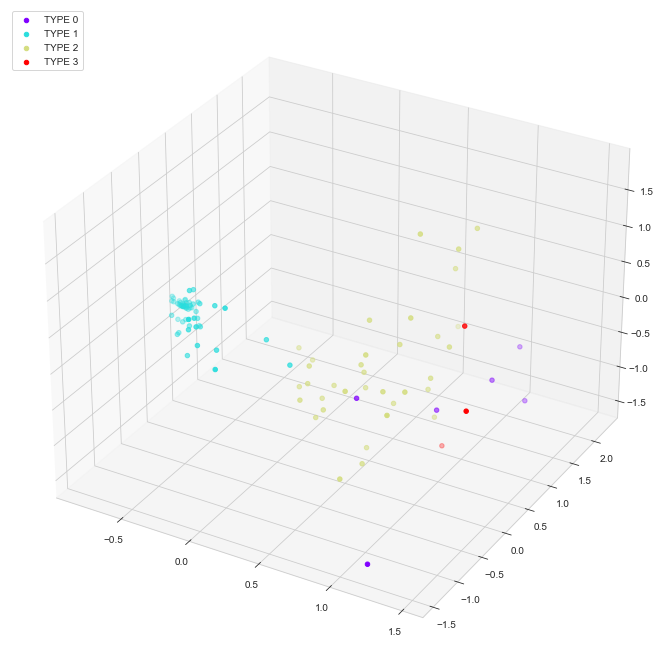

In [619]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt


import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,12))


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


ax = fig.add_subplot(111, projection='3d')
for i in range(kclusters):

    ax.scatter(pca_data_df[kmeans.labels_==i][0], pca_data_df[kmeans.labels_==i][1], pca_data_df[kmeans.labels_==i][2], marker='o' , c =    rainbow[i], label = f'TYPE {i}')
    plt.legend(loc="upper left")

    # ax.scatter(pca_data_df[kmeans.labels_==1][0], pca_data_df[kmeans.labels_==1][1], pca_data_df[kmeans.labels_==1][2], marker='x', c = 'r')


In [620]:

map_toranto = folium.Map(location=ans_df.describe().T['mean'], zoom_start=11)

# add markers to map
for lat, lng, label, i in zip(ans_df['Latitude'], ans_df['Longitude'], kmeans.labels_ , range(len(ans_df)) ):
    # print(label)
    text =  "type  " + str(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup= text,
        color= 'black',#rainbow[kmeans.labels_[i]],
        fill=True,
        fill_color=rainbow[kmeans.labels_[i]],
        fill_opacity=1,
        parse_html=False).add_to(map_toranto)  
    
map_toranto

In [621]:
type_dic

{0: ['Art Gallery', 'large_amount_of_facilities'],
 1: ['Playground', 'Park'],
 2: ['Restaurant', 'large_amount_of_facilities'],
 3: ['Yoga Studio', 'large_amount_of_facilities']}